Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...


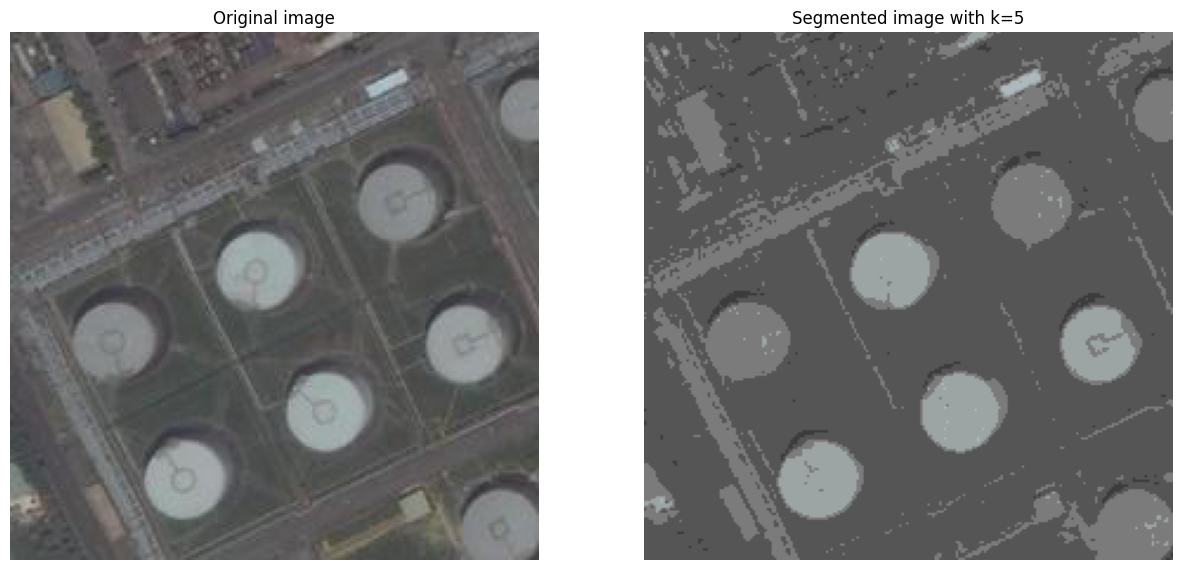

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from src import model

def main():
    # pre-processing
    img_path = '/content/00136.jpg'
    img = mpimg.imread(img_path)
    pixels = img.reshape((-1,3))

    # fitting
    n_clusters = 5
    agglo = model.AgglomerativeClustering(k=n_clusters, initial_k=25)
    agglo.fit(pixels)

    # prediction
    seg_img = [[agglo.predict_center(list(pixel)) for pixel in row] for row in img]
    seg_img = np.array(seg_img, np.uint8)

    # plotting results
    plt.figure(figsize=(15,15))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original image')

    plt.subplot(1,2,2)
    plt.imshow(seg_img)
    plt.axis('off')
    plt.title(f'Segmented image with k={n_clusters}')
    plt.show()


if __name__ == "__main__":
    main()

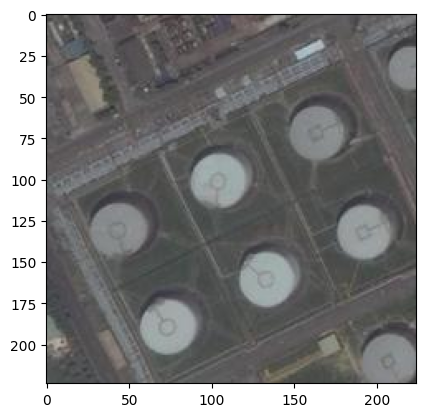

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/00136.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

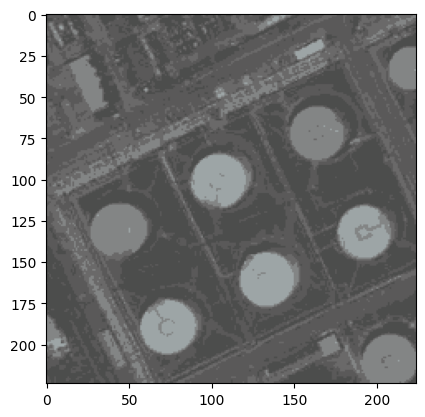

In [60]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

#Criteria for the algorithm to stop running,
#Happens when 100 iterations are run or the epsilon (required accuracy) becomes 85%

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# K-means clustering with number of clusters as 3
#Random centres are initially chosen for k-means clustering
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)
